In [1]:
# Import required Libraries
import hvplot.pandas
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import requests
from scipy.stats import linregress
import json

# Import API keys
from config import geoapify_key
from config import weather_api_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load HME projects weather info into a Dataframe
projects_weather_data_df = pd.read_csv("../project-1/data/projects_weather_data.csv")

# Display sample data
projects_weather_data_df.head()

,Project-Number,Name,Address,Lat,Lng,Weather_Category,Color,Temperature_F,Windspeed_mph
0,18-054,PAR 1244,"5950 York St, Denver, CO 80216, USA",39.805279,-104.958759,Good Weather,Green,42,6
1,18-121,SECURITY SANITATION WWTF IMPROVEMENTS,"6510 Southmoor Dr, Fountain, CO 80817, USA",38.736055,-104.737949,Good Weather,Green,44,10
2,18-145,WESTERN CURRENCY FACILITY EXPANSION,"8776 Blue Mound Rd, Fort Worth, TX 76131, USA",32.894373,-97.348633,Good Weather,Green,49,6
3,18-147,BID PACKAGE 4.3 - LEONARD WTP YARD PIPE,"361 Co Rd 4965, Leonard, TX 75452, USA",33.383391,-96.282564,Good Weather,Green,47,3
4,19-040,SADDLE CREEK RTB,"2520 S 64th St, Omaha, NE 68106, USA",41.240430,-96.011843,Good Weather,Green,36,6


In [3]:
# Use hvplot.points to create a colorized map

weather_map = projects_weather_data_df.hvplot.points(
    'Lng', 'Lat',
    geo=True, tiles='OSM', height=500, width=700,
    size=55,  # Adjust the size of the points
    line_color='black',
    line_width=0.75,
    color='Color',  # Set the color of the points
    title='Projects Weather Map',
    hover_cols=['Project-Number', 'Weather_Category', 'Temperature_F', 'Windspeed_mph'],
    legend='bottom_right',  # Show legend in the bottom-right corner
    
)

# Display the map
weather_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Color,Project-Number,Weather_Category,Temperature_F,Windspeed_mph)

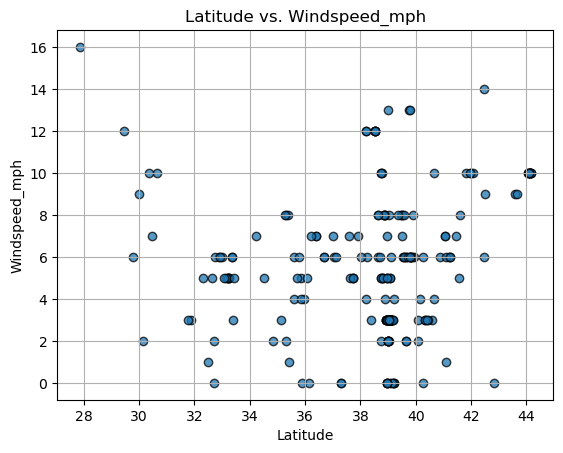

In [4]:
#create scatter plot for Latitude vs Wind

plt.scatter(projects_weather_data_df["Lat"], projects_weather_data_df["Windspeed_mph"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Windspeed_mph")
plt.xlabel("Latitude")
plt.ylabel("Windspeed_mph")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

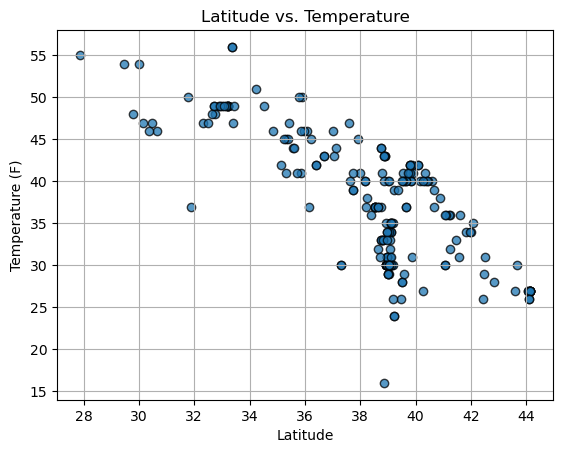

In [5]:
#create scatter plot for Latitude vs Temp
plt.scatter(projects_weather_data_df["Lat"], projects_weather_data_df["Temperature_F"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

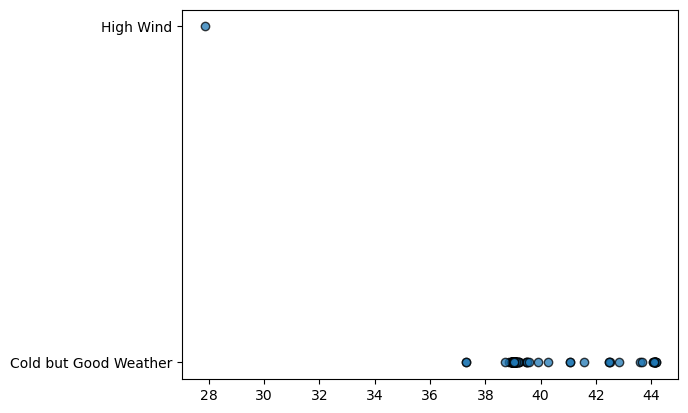

In [6]:
#create scatter plot for all weather days

# Filter out rows with 'Good Weather' in the 'Weather_Category' column
filtered_df = projects_weather_data_df[projects_weather_data_df['Weather_Category'] != 'Good Weather']

# Create a scatter plot for Weather Category vs Lat
plt.scatter(filtered_df["Lat"], filtered_df["Weather_Category"], edgecolors="black", alpha=0.75)

# Show the plot
plt.show()

In [7]:
# Create bar chart for weather_category
bar_chart = projects_weather_data_df['Weather_Category'].value_counts().hvplot.bar(
    height=400,
    width=800,
    title='Weather Category Distribution',
    xlabel='Weather Category',
    ylabel='Count',
    rot=45
)

# Show the plot
bar_chart

:Bars   [Weather_Category]   (count)

In [8]:
# List the total number of projects with rain/snow and/or wind over 15mph

bad_weather_filtered_df = projects_weather_data_df[projects_weather_data_df['Weather_Category'] != 'Good Weather']

total_projects = len(bad_weather_filtered_df)
print(f"Total number of projects with rain/snow and/or wind over 15 mph is: {total_projects}")

bad_weather_filtered_df.head()

Total number of projects with rain/snow and/or wind over 15 mph is: 83


,Project-Number,Name,Address,Lat,Lng,Weather_Category,Color,Temperature_F,Windspeed_mph
15,20-156,Goose Pasture Tarn Dam Rehabilitation,"271 Lakeshore Loop, Blue River, CO 80424, USA",39.455402,-106.032505,Cold but Good Weather,Blue,26,8
23,21-053,Allison WWTP Lift Station & Plant Improvements,"4104 Allison Rd, Corpus Christi, TX 78410, USA",27.855665,-97.565617,High Wind,Yellow,55,16
28,21-089,City of Early Water Treatment Facility,"103 Karr Ave, Early, IA 50535, USA",42.460463,-95.147699,Cold but Good Weather,Blue,29,14
38,21-122,SIRWA Creston WTP,"2127 US-34, Creston, IA 50801, USA",41.048706,-94.256015,Cold but Good Weather,Blue,30,7
40,21-127,Ellsworth AFB B-21 Low Observable Restoration ...,"Ellsworth AFB, SD, USA",44.146394,-103.074877,Cold but Good Weather,Blue,27,10


In [9]:
# Load HME projects weather info into a Dataframe
Weather_5Day_Forecast_df = pd.read_csv("../project-1/data/Weather_5Day_Forecast.csv")

# Display sample data
Weather_5Day_Forecast_df.head()

,Project-Number,Name,Lat,Lng,Weather_Date,Weather_Type
0,18-054,PAR 1244,39.805279,-104.958759,2024-01-08 06:00:00,Snow
1,18-054,PAR 1244,39.805279,-104.958759,2024-01-08 09:00:00,Snow
2,18-054,PAR 1244,39.805279,-104.958759,2024-01-08 09:00:00,High Wind
3,18-054,PAR 1244,39.805279,-104.958759,2024-01-08 12:00:00,Snow
4,18-054,PAR 1244,39.805279,-104.958759,2024-01-08 12:00:00,High Wind


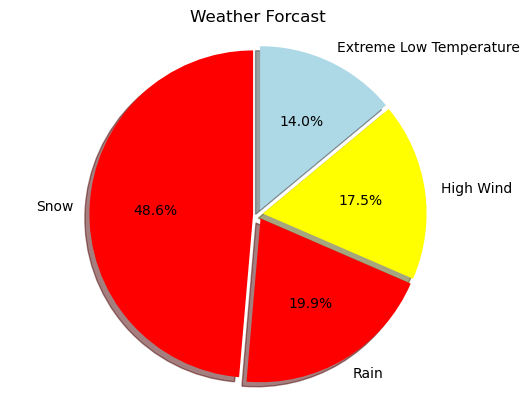

In [10]:
# Create pie chart for forecasted weather
    # if rain and/or snow color red, if high wind color yellow, if rain/snow/wind color red,
    #else if good weather color green

Weather = ['Snow', 'Rain', 'High Wind', 'Extreme Low Temperature']
weather_type_counts = Weather_5Day_Forecast_df['Weather_Type'].value_counts().reset_index()
weather_type_counts.columns = ['Weather_Type', 'Count']
colors = ['red', 'red', 'yellow', 'lightblue']
explode = (0.03, 0.03, 0.03, 0.03)

plt.title ('Weather Forcast')

plt.pie(weather_type_counts['Count'], labels=Weather, autopct='%1.1f%%', colors=colors, startangle=90, explode=explode, shadow=True)

plt.axis('equal')

plt.show()